This project has 2 case studies.The first case study (described below) covers concepts taught in Part 1 (first 8 hours
of Neural networks basics).
 
1st case study - Project 1:
 
The case study is from an open source dataset from Kaggle. 

Link to the Kaggle project site:
https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

Given a Bank customer, can we build a classifier which can determine whether they will leave or
not using Neural networks?
 
Case file: 

bank.csv
 
The points distribution for this case is as follows:
1. Read the dataset in a new python notebook.
2. Drop the columns which are unique for all users like IDs
3. Distinguish the feature and target set
4. Divide the data set into Train and test sets
5. Normalize the train and test data
6. Initialize &amp; build the model
7. Optimize the model
9. Predict the results using 0.5 as a threshold
10. Print the Accuracy score and confusion matrix

Read the dataset in a new python notebook.

In [77]:
%tensorflow_version 2.0
import tensorflow as tf
print(tf.__version__)

`%tensorflow_version` only switches the major version: `1.x` or `2.x`.
You set: `2.0`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.
2.1.0-rc1


In [0]:
import pandas as pd
import numpy as np

In [79]:
from google.colab import drive

drive.mount('/content/gdrive')
root_path = "gdrive/My Drive/GreatLearning/myprojects/Residency6/bank.csv"  #change dir to your project folder
bankdf = pd.read_csv(root_path)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [80]:
bankdf.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [81]:
bankdf.shape

(10000, 14)

In [82]:
bankdf.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [84]:
bankdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


There are no null values.
Three categorical type variables (Surname,Geography and Gender)

In [85]:
bankdf.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


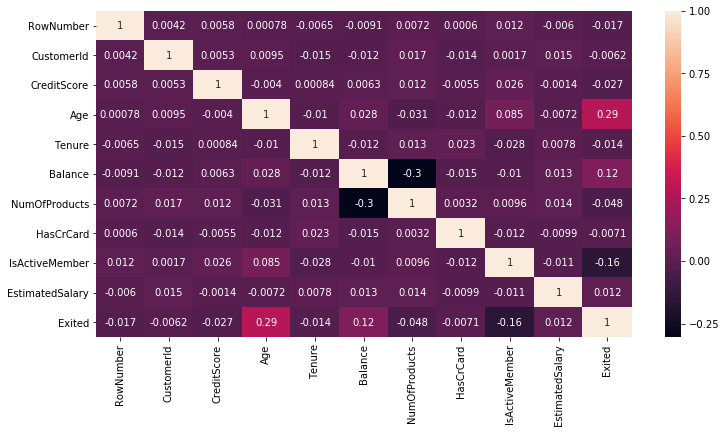

In [86]:
#Checking for correlation of features
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
sns.heatmap(bankdf[bankdf.columns[0:]].corr(),annot=True)

There seems to be very less correlation between features

Drop the columns which are unique for all users like IDs.

In [0]:
dataset = bankdf.drop(['Surname', 'CustomerId', 'RowNumber'], axis=1)

In [88]:
dataset.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [89]:
#checking unique values for categorical columns
print('Unique values in Geography column: ', dataset.Geography.unique())
print('Unique values in Gender column: ', dataset.Gender.unique())
print('Unique values in Exited column: ', dataset.Exited.unique())

Unique values in Geography column:  ['France' 'Spain' 'Germany']
Unique values in Gender column:  ['Female' 'Male']
Unique values in Exited column:  [1 0]


In [0]:
# Encoding categorical data into scalar values.
# Gender column has 2 unique values : Male and Female
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le_gender = LabelEncoder()
dataset.Gender = le_gender.fit_transform(dataset.Gender)

In [0]:
# Encoding categorical data into scalar values.
# Geography column has 3 unique values : France, Spain and Germany
dataset = pd.concat([dataset,pd.get_dummies(dataset.Geography, prefix = 'Geography', dtype = 'float32')],axis=1).drop(['Geography'],axis=1)

In [93]:
dataset.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [94]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
CreditScore          10000 non-null int64
Gender               10000 non-null int64
Age                  10000 non-null int64
Tenure               10000 non-null int64
Balance              10000 non-null float64
NumOfProducts        10000 non-null int64
HasCrCard            10000 non-null int64
IsActiveMember       10000 non-null int64
EstimatedSalary      10000 non-null float64
Exited               10000 non-null int64
Geography_France     10000 non-null float32
Geography_Germany    10000 non-null float32
Geography_Spain      10000 non-null float32
dtypes: float32(3), float64(2), int64(8)
memory usage: 898.6 KB


Some more EDA below to check outliers

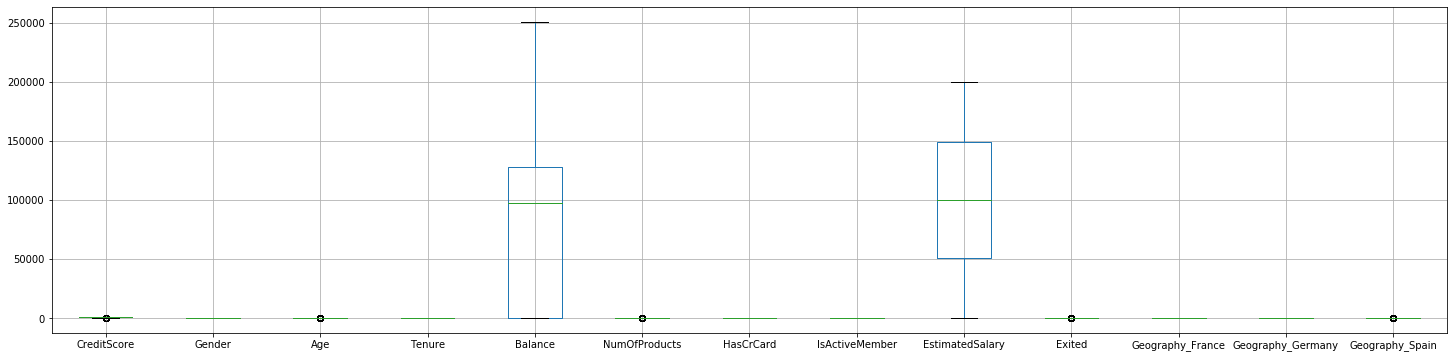

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt
dataset.boxplot(figsize=(25,6))

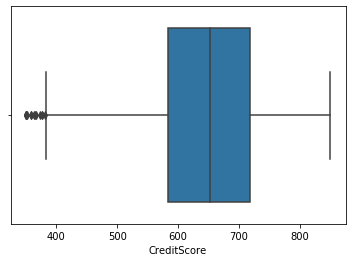

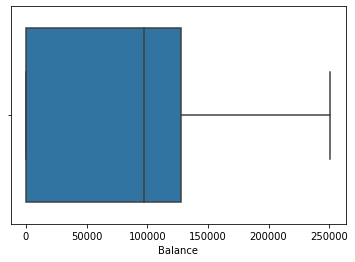

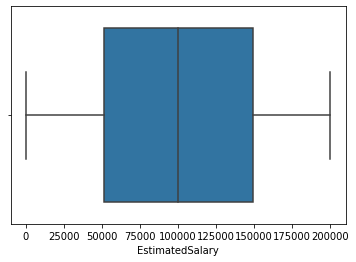

In [104]:
sns.boxplot(dataset.CreditScore)
plt.show()
sns.boxplot(dataset.Balance)
plt.show()
sns.boxplot(dataset.EstimatedSalary)
plt.show()

CreditScore feature seems to have lower outliers.

Outlier detection and imputation below

In [106]:
#Outlier detection and processing
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR
print('Upper limit for each feature outliers: ')
print(upper_limit)
print('Lower limit for each feature outliers: ')
print(lower_limit)
outliers = ((dataset < lower_limit) | (dataset > upper_limit)).sum()
print('Number of outliers for each features: ')
print(outliers)

Upper limit for each feature outliers: 
CreditScore             919.00000
Gender                    2.50000
Age                      62.00000
Tenure                   13.00000
Balance              319110.60000
NumOfProducts             3.50000
HasCrCard                 2.50000
IsActiveMember            2.50000
EstimatedSalary      296967.45375
Exited                    0.00000
Geography_France          2.50000
Geography_Germany         2.50000
Geography_Spain           0.00000
dtype: float64
Lower limit for each feature outliers: 
CreditScore             383.00000
Gender                   -1.50000
Age                      14.00000
Tenure                   -3.00000
Balance             -191466.36000
NumOfProducts            -0.50000
HasCrCard                -1.50000
IsActiveMember           -1.50000
EstimatedSalary      -96577.09625
Exited                    0.00000
Geography_France         -1.50000
Geography_Germany        -1.50000
Geography_Spain           0.00000
dtype: float64
Number

Outlier imputation

In [107]:
#Imputing 'CreditScore' outliers
print('Credit Score before outliers imputation: ')
print(pd.crosstab(dataset['CreditScore'],dataset['Exited']))
dataset['CreditScore'] = np.where(dataset['CreditScore'] > upper_limit['CreditScore'],int(upper_limit['CreditScore']),dataset['CreditScore'])
dataset['CreditScore'] = np.where(dataset['CreditScore'] < lower_limit['CreditScore'],int(lower_limit['CreditScore'] + 1),dataset['CreditScore'])
print('Credit Score after outliers imputation: ')
print(pd.crosstab(dataset['CreditScore'],dataset['Exited']))

Credit Score before outliers imputation: 
Exited         0   1
CreditScore         
350            0   5
351            0   1
358            0   1
359            0   1
363            0   1
...          ...  ..
846            3   2
847            4   2
848            5   0
849            6   2
850          190  43

[460 rows x 2 columns]
Credit Score after outliers imputation: 
Exited         0   1
CreditScore         
383            0   1
384            0  15
386            0   1
395            0   1
399            0   1
...          ...  ..
846            3   2
847            4   2
848            5   0
849            6   2
850          190  43

[451 rows x 2 columns]


CreditScore feature boxplot after outlier imputations

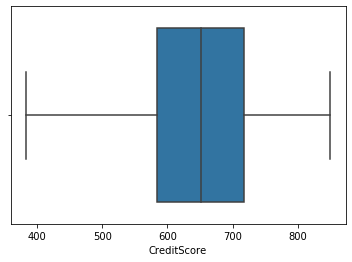

In [108]:
sns.boxplot(dataset.CreditScore)

Distinguish the feature and target set

In [0]:
X = dataset.drop(['Exited','Geography_Spain'],axis=1)
Y = dataset.Exited

Divide the data set into Train and test sets.

In [0]:
# Splitting the dataset into the Training and Testing set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 9)

Normalize the train and test data

In [0]:
X_train = np.array(X_train).astype('float32')
X_test = np.array(X_test).astype('float32')
y_train =np.array(y_train).astype('float32')
y_test = np.array(y_test).astype('float32')

In [0]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [113]:
print(f'Training shapes: {X_train.shape}, {y_train.shape}')
print(f'Testing shapes: {X_test.shape}, {y_test.shape}')

Training shapes: (8000, 11), (8000,)
Testing shapes: (2000, 11), (2000,)


Initialize & build the model

In [0]:
#Importing required keras modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.backend import clear_session
from tensorflow.keras.layers import Reshape, Dense, Dropout, BatchNormalization, Activation

In [0]:
clear_session()
# Initializing the DNN model
model1 = Sequential()

# #Add Input Layer (first hidden layer)
model1.add(Dense(units = 6, input_dim = X_train.shape[1], activation = 'relu'))

# Add second hidden layer
model1.add(Dense(units=6, activation = 'relu')) 

# Adding the output layer
# We use the sigmoid to get probability outcomes for binary class
model1.add(Dense(units=1, activation = 'sigmoid'))

model1.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [116]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


From the model summary:
Model built above has three layers.Input layer, hidden layer and output layer with output layer has one neuron for binary class output

In [117]:
model1.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=10)

Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s 101us/sample - loss: 0.8571 - accuracy: 0.4112 - val_loss: 0.6689 - val_accuracy: 0.6880
Epoch 2/10
8000/8000 [==============================] - 0s 58us/sample - loss: 0.6261 - accuracy: 0.7835 - val_loss: 0.6002 - val_accuracy: 0.7990
Epoch 3/10
8000/8000 [==============================] - 0s 58us/sample - loss: 0.5785 - accuracy: 0.8061 - val_loss: 0.5643 - val_accuracy: 0.7995
Epoch 4/10
8000/8000 [==============================] - 0s 59us/sample - loss: 0.5470 - accuracy: 0.8087 - val_loss: 0.5363 - val_accuracy: 0.8045
Epoch 5/10
8000/8000 [==============================] - 0s 57us/sample - loss: 0.5218 - accuracy: 0.8110 - val_loss: 0.5132 - val_accuracy: 0.8130
Epoch 6/10
8000/8000 [==============================] - 0s 56us/sample - loss: 0.5003 - accuracy: 0.8145 - val_loss: 0.4924 - val_accuracy: 0.8175
Epoch 7/10
8000/8000 [==============================] - 0s 57us/sampl

Optimize the model

For Optimizing model, following can be attempted,

1.Number of hidden layer and number of neurons in each hidden layer can be adjusted.

2.Batch normalization layer can be added.

3.Dropout layer can be added

3.selection of optimizer

4.value initialization

5.parameter tuning for selected optimizer


Following changes will be done in above model to optimize:

1.One hidden layer will added

2.Number of neurons will be increased to 8 from 6

3.Batch Normalization will be added after each layer

4.Number of epochs will be increased to 100 from 10

5.Batch size will be reduced to 10 from 32

6.Dropout layer will be added with 10% drop after each hidden layer

In [0]:
clear_session()

# Initialize Sequential model
model2 = Sequential()

#Add Input Layer (first hidden layer)
model2.add(Dense(units = 8, activation = 'relu', input_dim = X_train.shape[1]))

# BatchNormalization layer
model2.add(BatchNormalization())
# Dropout layer
model2.add(Dropout(rate=0.2))

#Add Second hidden layer
model2.add(Dense(units = 8, activation = 'relu'))

# BatchNormalization layer
model2.add(BatchNormalization())
# Dropout layer
model2.add(Dropout(rate=0.2))

#Add Third hidden layer
model2.add(Dense(units = 8, activation = 'relu'))

# BatchNormalization layer
model2.add(BatchNormalization())
# Dropout layer
model2.add(Dropout(rate=0.3))

# Add Output Layer
model2.add(Dense(1, activation='sigmoid'))

In [0]:
model2.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [120]:
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 96        
_________________________________________________________________
batch_normalization (BatchNo (None, 8)                 32        
_________________________________________________________________
dropout (Dropout)            (None, 8)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
batch_normalization_1 (Batch (None, 8)                 32        
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 7

In [121]:
model2.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=10, epochs=100)

Train on 8000 samples, validate on 2000 samples
Epoch 1/100
8000/8000 [==============================] - 3s 354us/sample - loss: 0.5913 - accuracy: 0.6964 - val_loss: 0.4893 - val_accuracy: 0.7885
Epoch 2/100
8000/8000 [==============================] - 2s 235us/sample - loss: 0.4953 - accuracy: 0.7928 - val_loss: 0.4739 - val_accuracy: 0.7890
Epoch 3/100
8000/8000 [==============================] - 2s 233us/sample - loss: 0.4833 - accuracy: 0.7956 - val_loss: 0.4669 - val_accuracy: 0.7890
Epoch 4/100
8000/8000 [==============================] - 2s 236us/sample - loss: 0.4639 - accuracy: 0.7969 - val_loss: 0.4611 - val_accuracy: 0.7890
Epoch 5/100
8000/8000 [==============================] - 2s 242us/sample - loss: 0.4648 - accuracy: 0.7981 - val_loss: 0.4553 - val_accuracy: 0.7910
Epoch 6/100
8000/8000 [==============================] - 2s 240us/sample - loss: 0.4567 - accuracy: 0.7962 - val_loss: 0.4485 - val_accuracy: 0.7895
Epoch 7/100
8000/8000 [==============================] - 2

Removing Dropout layers to check the model performance.

Number of neurons in each layer as 6.

Adding one more hidden layer

BatchNormalization after each layer

In [124]:
clear_session()

# Initialize Sequential model
model3 = Sequential()

#Add Input Layer (first hidden layer)
model3.add(Dense(units = 6, activation = 'relu', input_dim = X_train.shape[1]))

# BatchNormalization layer
model3.add(BatchNormalization())

#Add Second hidden layer
model3.add(Dense(units = 6, activation = 'relu'))

# BatchNormalization layer
model3.add(BatchNormalization())

#Add Third hidden layer
model3.add(Dense(units = 6, activation = 'relu'))

# BatchNormalization layer
model3.add(BatchNormalization())

#Add Fourth hidden layer
model3.add(Dense(units = 6, activation = 'relu'))

# BatchNormalization layer
model3.add(BatchNormalization())

# Add Output Layer
model3.add(Dense(1, activation='sigmoid'))

model3.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

model3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 72        
_________________________________________________________________
batch_normalization (BatchNo (None, 6)                 24        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
batch_normalization_1 (Batch (None, 6)                 24        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
batch_normalization_2 (Batch (None, 6)                 24        
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 4

In [125]:
model3.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=10, epochs=100)

Train on 8000 samples, validate on 2000 samples
Epoch 1/100
8000/8000 [==============================] - 3s 373us/sample - loss: 0.5689 - accuracy: 0.7448 - val_loss: 0.4941 - val_accuracy: 0.7930
Epoch 2/100
8000/8000 [==============================] - 2s 237us/sample - loss: 0.4819 - accuracy: 0.7954 - val_loss: 0.4678 - val_accuracy: 0.7980
Epoch 3/100
8000/8000 [==============================] - 2s 239us/sample - loss: 0.4664 - accuracy: 0.7970 - val_loss: 0.4576 - val_accuracy: 0.7960
Epoch 4/100
8000/8000 [==============================] - 2s 247us/sample - loss: 0.4545 - accuracy: 0.7968 - val_loss: 0.4509 - val_accuracy: 0.7975
Epoch 5/100
8000/8000 [==============================] - 2s 250us/sample - loss: 0.4465 - accuracy: 0.8012 - val_loss: 0.4454 - val_accuracy: 0.8060
Epoch 6/100
8000/8000 [==============================] - 2s 253us/sample - loss: 0.4393 - accuracy: 0.7990 - val_loss: 0.4412 - val_accuracy: 0.8025
Epoch 7/100
8000/8000 [==============================] - 2

With Adam optimizer, once the initial learning rate is set, there is no need to tune the learning rate.

First and Second models above used adam optimizer.

Building model4 with SGD with neserov momentum with same epoch and batchsize, to compare the effect of optimizer change.

In [0]:
clear_session()

# Initialize Sequential model
model4 = Sequential()

#Add Input Layer (first hidden layer)
model4.add(Dense(units = 7, activation = 'relu', input_dim = X_train.shape[1]))

# BatchNormalization layer
model4.add(BatchNormalization())
# Dropout layer
model4.add(Dropout(rate=0.1))

#Add Second hidden layer
model4.add(Dense(units = 7, activation = 'relu'))

# BatchNormalization layer
model4.add(BatchNormalization())
# Dropout layer
model4.add(Dropout(rate=0.1))

#Add Third hidden layer
model4.add(Dense(units = 7, activation = 'relu'))

# BatchNormalization layer
model4.add(BatchNormalization())
# Dropout layer
model4.add(Dropout(rate=0.1))

# Add Output Layer
model4.add(Dense(1, activation='sigmoid'))

#Compile the model
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.01, momentum = 0.9, decay=0.001,nesterov = True)
model4.compile(optimizer=sgd_optimizer, loss = 'binary_crossentropy', metrics=['accuracy'])

In [127]:
model4.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 7)                 84        
_________________________________________________________________
batch_normalization (BatchNo (None, 7)                 28        
_________________________________________________________________
dropout (Dropout)            (None, 7)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 56        
_________________________________________________________________
batch_normalization_1 (Batch (None, 7)                 28        
_________________________________________________________________
dropout_1 (Dropout)          (None, 7)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 5

In [128]:
model4.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=10, epochs=100)

Train on 8000 samples, validate on 2000 samples
Epoch 1/100
8000/8000 [==============================] - 3s 355us/sample - loss: 0.4807 - accuracy: 0.7901 - val_loss: 0.4434 - val_accuracy: 0.8120
Epoch 2/100
8000/8000 [==============================] - 2s 238us/sample - loss: 0.4422 - accuracy: 0.8010 - val_loss: 0.4330 - val_accuracy: 0.8175
Epoch 3/100
8000/8000 [==============================] - 2s 235us/sample - loss: 0.4313 - accuracy: 0.8048 - val_loss: 0.4217 - val_accuracy: 0.8185
Epoch 4/100
8000/8000 [==============================] - 2s 235us/sample - loss: 0.4286 - accuracy: 0.8037 - val_loss: 0.4162 - val_accuracy: 0.8225
Epoch 5/100
8000/8000 [==============================] - 2s 238us/sample - loss: 0.4240 - accuracy: 0.7999 - val_loss: 0.4107 - val_accuracy: 0.8245
Epoch 6/100
8000/8000 [==============================] - 2s 244us/sample - loss: 0.4233 - accuracy: 0.8016 - val_loss: 0.4094 - val_accuracy: 0.8255
Epoch 7/100
8000/8000 [==============================] - 2

From the above observations:

1.Adam optimizer doesnot need learning rate tuning.

2.Given that SGD with nesterov momentum doesnot provide significant difference in the validation accuracy.Adam seems to be preferred for given dataset.

3.Model gives better test accuracy with added hidden layer and increasing neurons in some layers.

4.Adding Dropout layer in this model with the given dataset doesnot seem to have much benefit.

5.Calculating further evaluation metrics and prediction based on model3 above which is built with BatchNormalization, without Dropout layer, adam optimizer and activation function as RELU.

Predict the results using 0.5 as a threshold

In [134]:
y_pred = model3.predict(X_test)
print(y_pred)

[[0.01550601]
 [0.08976354]
 [0.22593449]
 ...
 [0.05970111]
 [0.16198438]
 [0.08262753]]


In [135]:
y_pred = y_pred > 0.5
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

Print the Accuracy score and confusion matrix

In [136]:
from sklearn.metrics import confusion_matrix, classification_report
print('Classification Report:')
cr = classification_report(y_test,y_pred)
print(cr)

print('Confusion Matrix:')
cm = confusion_matrix(y_test,y_pred)
print(cm)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.97      0.91      1578
         1.0       0.78      0.44      0.56       422

    accuracy                           0.86      2000
   macro avg       0.82      0.70      0.74      2000
weighted avg       0.85      0.86      0.84      2000

Confusion Matrix:
[[1526   52]
 [ 237  185]]


In [137]:
print('Model Evaluation on test data: ')
results = model3.evaluate(X_test, y_test, verbose=0)
print('Test loss, Test Accuracy : ', results)

Model Evaluation on test data: 
Test loss, Test Accuracy :  [0.3531767244338989, 0.8555]


Model3 trained with 100 epochs and batch size of 10 and adam optimizers with BatchNormalization gives the test accuracy of around 85.5% and loss (binary crossentropy) value of around 0.353

Model summary in each model building step above depicts the model representation.

Batch Normalization layer normalizes the previous layer output at each batch.This leads to non-trainable parameters mu and signma which are not updated by gradient descent and trainable parameters gamma and beta which are updated based on required scaling and shifting as per gradient descent.Batchnormalization layer is used to reduce overfitting and also normalization helps reduce the effect of varying distribution of input data when test data is fed to the model.

Dropout layer helps to reduce overfitting.In abover models, Dropout layer doesnot seem to have much effect on validation accuracy improvement.


Three models were built above to optimize first model which was very basic with on input layer, one hidden layer and one output layer.

Then additional hidden layer, BatchNormatization and Dropout layer was added in first model to optimize the model.Epoch was reduced and Epoch was increased.Optimizer was adam.

Third model removed Dropout layers in second model to check the effect on validation accuracy for this given dataset.

Fourth model used SGD with nesterov momentum to check the effect of chanding the optimizer for this given dataset.

Finally model3 was used for prediction and metrics evaluation.